# Connect 4 AI
The goal of this notebook is to make multiple agents with vairing sophistications, sizes and powers to comapre them against each other

In [14]:
# Enviornment modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Circle
import random
from ipywidgets import widgets
from IPython.display import clear_output
import time

# Local Modules
import connect

## Create an Environment
This board inviornment is defined in connect.py

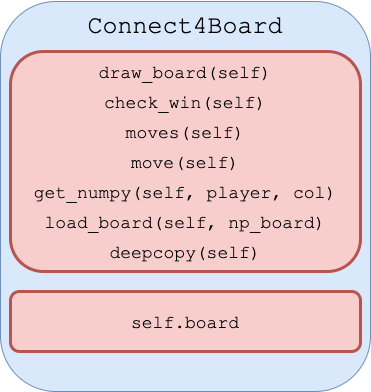

### Test winner checker


In [15]:
%%bash
python -m unittest boardtest

.....
----------------------------------------------------------------------
Ran 5 tests in 0.000s

OK


### Test Placing a piece

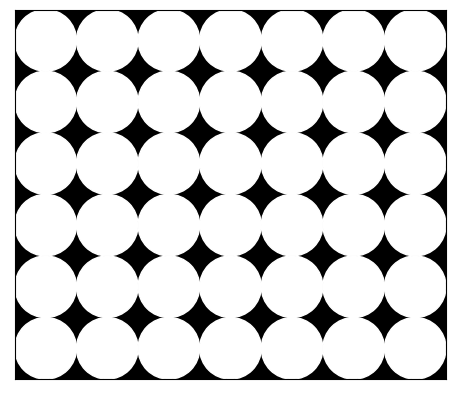

In [16]:
b = connect.Connect4Board()
b.draw_board()

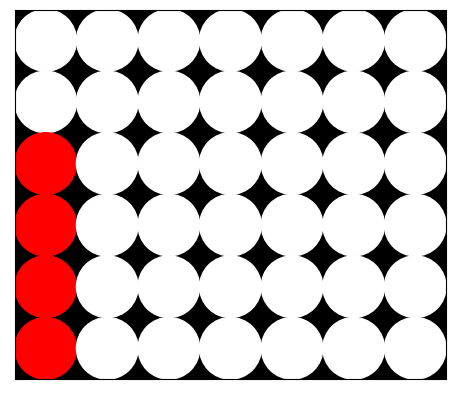

In [17]:
b.move(1, 0)
b.move(1, 0)
b.move(1, 0)
b.move(1, 0)
b.draw_board()

## Random Agent

In [18]:
class RandomAgent:
    
    def __init__(self):
        self.name = "randy"
        random.seed(time.time())
        
    def pick_move(self, board):
        """
        pick a random move
        """
        return random.choice(board.moves())
    
    def pick_and_place_move(self, board, player):
        """
        pick a move and place it on the board
        """
        return board.move(player, self.pick_move(board))

### Test Random

Player $1 won
[('Player 1', 6), ('Player 2', 1), ('Player 1', 4), ('Player 2', 5), ('Player 1', 0), ('Player 2', 2), ('Player 1', 4), ('Player 2', 1), ('Player 1', 1), ('Player 2', 3), ('Player 1', 6), ('Player 2', 2), ('Player 1', 5), ('Player 2', 1), ('Player 1', 0), ('Player 2', 2), ('Player 1', 0), ('Player 2', 1), ('Player 1', 4), ('Player 2', 6), ('Player 1', 4)]


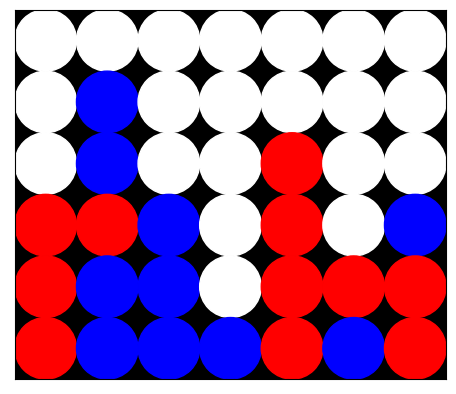

In [19]:
randy = RandomAgent()
b = connect.Connect4Board()

# place all randome moves
seq = []
player = 1
for i in range(42):
    new_move = randy.pick_move(b)
    b.move(player=player, col=new_move)
    seq.append((f"Player {player}", new_move))
    if player == 1:
        player = 2
    else: 
        player = 1
    winner = b.check_win()
    if winner != 0:
        print(f"Player ${winner} won")
        break
print(seq)
b.draw_board()

## Monte Carlo Agent

In [20]:
class MonteAgent:
    def __init__(self, player=1, n=10):
        self.player=player
        self.n=n
        self.randy = RandomAgent()
        self.name = "Monte"
    def pick_move(self, player, board):
        """
        pick a move with a monte_carlo search
        """
        moves = board.moves()
        move_boards = []
        for m in moves:
            new_board = board.deepcopy()
            new_board.move(player, m)
            move_boards.append((m, new_board))
        
        scores = []
        for m_b in move_boards:
            scores.append(self._playNTimes(m_b[1]))

        max = 0
        index = 0 
        for i, s in enumerate(scores):
            if s > max:
                max = s
                index = i 
        return move_boards[index][0]
    
    def pick_and_place_move(self, board, player):
        """
        pick a move and place it on the board
        """
        return board.move(player, self.pick_move(player, board))
    
    def _randomPlayTillDone(self, board):
        #oppo goes first since the board is already moved
        player = 2 if self.player == 1 else 1
        for i in range(42):
            new_move = self.randy.pick_move(b)
            board.move(player=player, col=new_move)
            if player == 1:
                player = 2
            else: 
                player = 1
            winner = board.check_win()
            if winner != 0:
                break
        return 1 if winner == self.player else 0
    
    def _playNTimes(self,  board):

        win = 0
        total = 0
        for i in range(self.n):
            new_board = board.deepcopy()

            if self._randomPlayTillDone(new_board) == 1:
                win += 1
            total += 1
        return win / total


Player $1 won
[('Player 1', 3), ('Player 2', 5), ('Player 1', 1), ('Player 2', 1), ('Player 1', 3), ('Player 2', 3), ('Player 1', 0), ('Player 2', 2), ('Player 1', 2), ('Player 2', 2), ('Player 1', 5), ('Player 2', 5), ('Player 1', 0), ('Player 2', 5), ('Player 1', 5), ('Player 2', 6), ('Player 1', 2), ('Player 2', 1), ('Player 1', 0), ('Player 2', 5), ('Player 1', 0)]


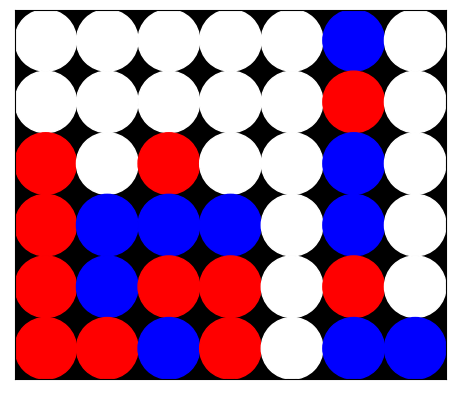

In [25]:
# place all randome moves
monte = MonteAgent(player=1, n=10)
randy = RandomAgent()
b = connect.Connect4Board()
import time
random.seed(time.time())
seq = []
player = 1
for i in range(42):
    winner = b.check_win()
    if winner != 0:
        print(f"Player ${winner} won")
        break
    if player == 1:
        new_move = monte.pick_move(player=player, board=b)
        b.move(player=player, col=new_move)
        seq.append((f"Player {player}", new_move))

    else:
        new_move = randy.pick_move(b)
        b.move(player=player, col=new_move)
        seq.append((f"Player {player}", new_move))
    if player == 1:
        player = 2
    else: 
        player = 1
print(seq)
b.draw_board()

In [26]:
interactive_board = connect.Connect4Board()
interactive_player = 1
interactive_agent1 = None
interactive_agent2 = None

def button_callback(b):
    global interactive_player, interactive_agent1, interactive_agent2
    clear_output()
    desc = b.description
    col = int(desc.split()[1])
    
    # Move currnet player
    interactive_board.move(col=col, player=interactive_player)
    
    winner = interactive_board.check_win()
    if winner != 0:
        print(f"The winer was {interactive_player}")
        interactive_board.draw_board()
        return
        
    # Flip Player
    if interactive_player == 1:
        interactive_player = 2
    else:
        interactive_player = 1
        
    # Place and flip if a agent is used
    if interactive_player == 1 and interactive_agent1 != "interactive":
        print(interactive_agent1.name)
        interactive_agent1.pick_and_place_move(board=interactive_board, player=interactive_player)
        player = 2
    if interactive_player == 2 and interactive_agent2 != "interactive":
        print(interactive_agent2.name)
        interactive_agent2.pick_and_place_move(board=interactive_board, player=interactive_player)
        interactive_player = 1
        
    winner = interactive_board.check_win()
    if winner == 0:
        create_interactive_board(agent1=interactive_agent1, agent2=interactive_agent2)
        interactive_board.draw_board()
    else:
        print(f"The winer was {interactive_player}")
    

def create_interactive_board(agent1="interactive", agent2=RandomAgent()):
    global interactive_agent1, interactive_agent2
    print("test")
    
    interactive_agent1 = agent1
    interactive_agent2 = agent2
    buttons = []
    # Create a button for each column
    for i in range(7):
        button = widgets.Button(description=f"Column {i}")
        button.on_click(button_callback)
        buttons.append(button)
        
    container = widgets.HBox(buttons)
    display(container)
    
#create_interactive_board()
#interactive_board.draw_board()

test


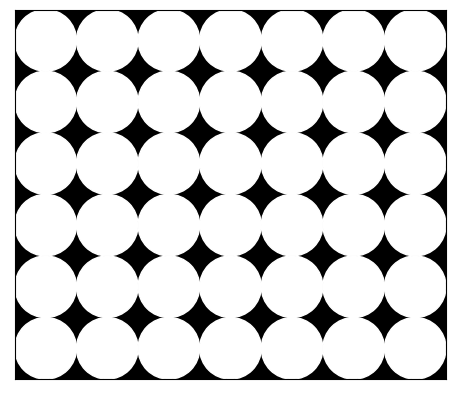

In [27]:
interactive_board = connect.Connect4Board()
interactive_player = 1
interactive_agent1 = None
interactive_agent2 = None
monte = MonteAgent(player=2, n=1000)
create_interactive_board(agent1="interactive", agent2=monte)
interactive_board.draw_board()